In [1]:
import numpy as np
import pandas
import os

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D , Flatten , Dense , MaxPooling2D , Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

**EDA**

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma' ,'meningioma','notumor','pituitary']
for i in labels:
    folderPath = os.path.join(r"C:\Users\91811\Desktop\python_ml\deep learning\dataset_for_mini_project\Training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img , (image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
    folderPath = os.path.join(r"C:\Users\91811\Desktop\python_ml\deep learning\dataset_for_mini_project\Testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img , (image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
X_train , Y_train = shuffle(X_train , Y_train , random_state = 101)
X_train.shape

(7023, 150, 150, 3)

**Train Test Split**

In [6]:
# Assuming X_train and Y_train are numpy arrays

# Find the minimum length of the two arrays
min_length = min(X_train.shape[0], Y_train.shape[0])

# Truncate the arrays to the minimum length
X_train = X_train[:min_length]
Y_train = Y_train[:min_length]

X_train , Y_train = shuffle(X_train , Y_train , random_state = 101)
X_train.shape

(7023, 150, 150, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

**CNN MODEL**

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
# history = model.fit(X_train,y_train,epochs=10,validation_split=0.1,batch_size=32)

In [13]:
# Load the model
loaded_model = tf.keras.models.load_model(r"C:\Users\91811\Desktop\python_ml\deep learning\braintumor_mini_pro.h5")

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

some coding work for plotting the charts

In [15]:
img = cv2.imread(r"C:\Users\91811\Desktop\python_ml\deep learning\dataset_for_mini_project\Testing\pituitary\Te-pi_0046.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [16]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

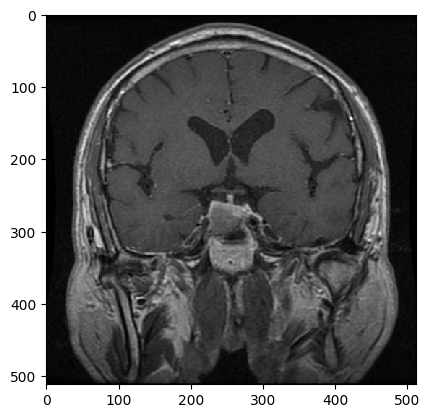

In [17]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\91811\Desktop\python_ml\deep learning\dataset_for_mini_project\Testing\pituitary\Te-pi_0046.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [18]:
a=loaded_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 691ms/step


3